In [1]:
import torch
import numpy as np

In [2]:
from model import SimpleCNN
model = SimpleCNN()

In [3]:
from loader import load
BATCH_SIZE = 64
train_loader, val_loader, test_loader = load(batch_size=BATCH_SIZE)

In [4]:
from trainer import train as train_model
from optimizer.sls_optimizer import SLSOptimizer 
from optimizer.rdls_optimizer import RDLSOptimizer 

In [5]:
device = torch.device("cuda" if torch.cuda.is_available() else "mps" if torch.mps.is_available() else "cpu")
print("Using device:", device)
#device = "cpu" 

model.to(device)

criterion = torch.nn.CrossEntropyLoss()
optimizer = SLSOptimizer(model.parameters(), n_batches_per_epoch=np.ceil(len(train_loader) / BATCH_SIZE), line_search_fn="goldstein") 
#optimizer = RDLSOptimizer(model.parameters())

#optimizer = torch.optim.SGD(model.parameters())

model, loss_history, step_size_history = train_model(model, train_loader, val_loader, optimizer, criterion, device, 1)

Using device: cpu
Epoch [1/1], Loss: 0.6971
Validation Loss: 0.4494, Accuracy: 84.32%


Text(0.5, 1.0, 'Step Size History')

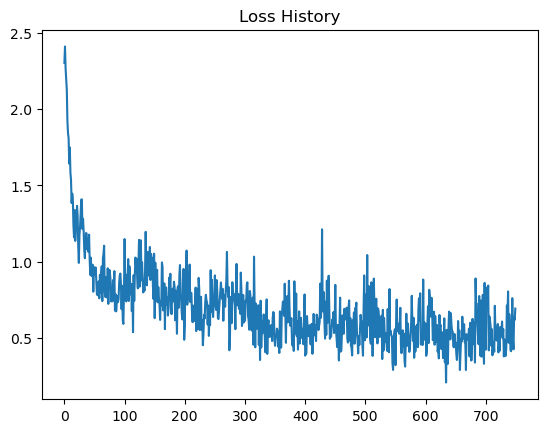

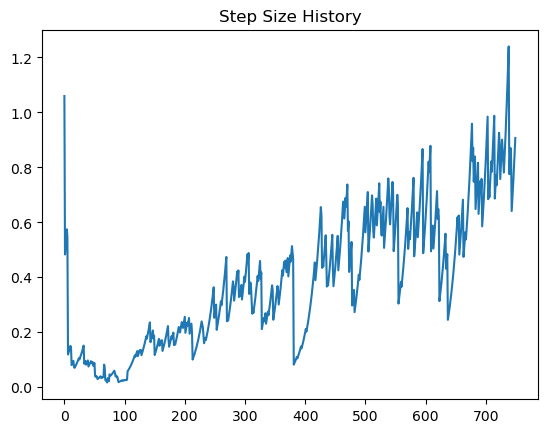

In [6]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(loss_history)
plt.title("Loss History")

plt.figure()
plt.plot(step_size_history)
plt.title("Step Size History")